In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates.builtin_frames import Galactic
from astroquery.vizier import Vizier
from astroquery.simbad import Simbad
from mw_plot import MWPlot, MWSkyMap

plt.style.use("presentation")

In [3]:
df = pd.read_csv("dib_locations.csv")

In [16]:
# df.to_csv("dib_locations.csv")

In [4]:
coordinates = SkyCoord(df["GLON"]*u.degree, df["GLAT"]*u.degree, frame=Galactic)

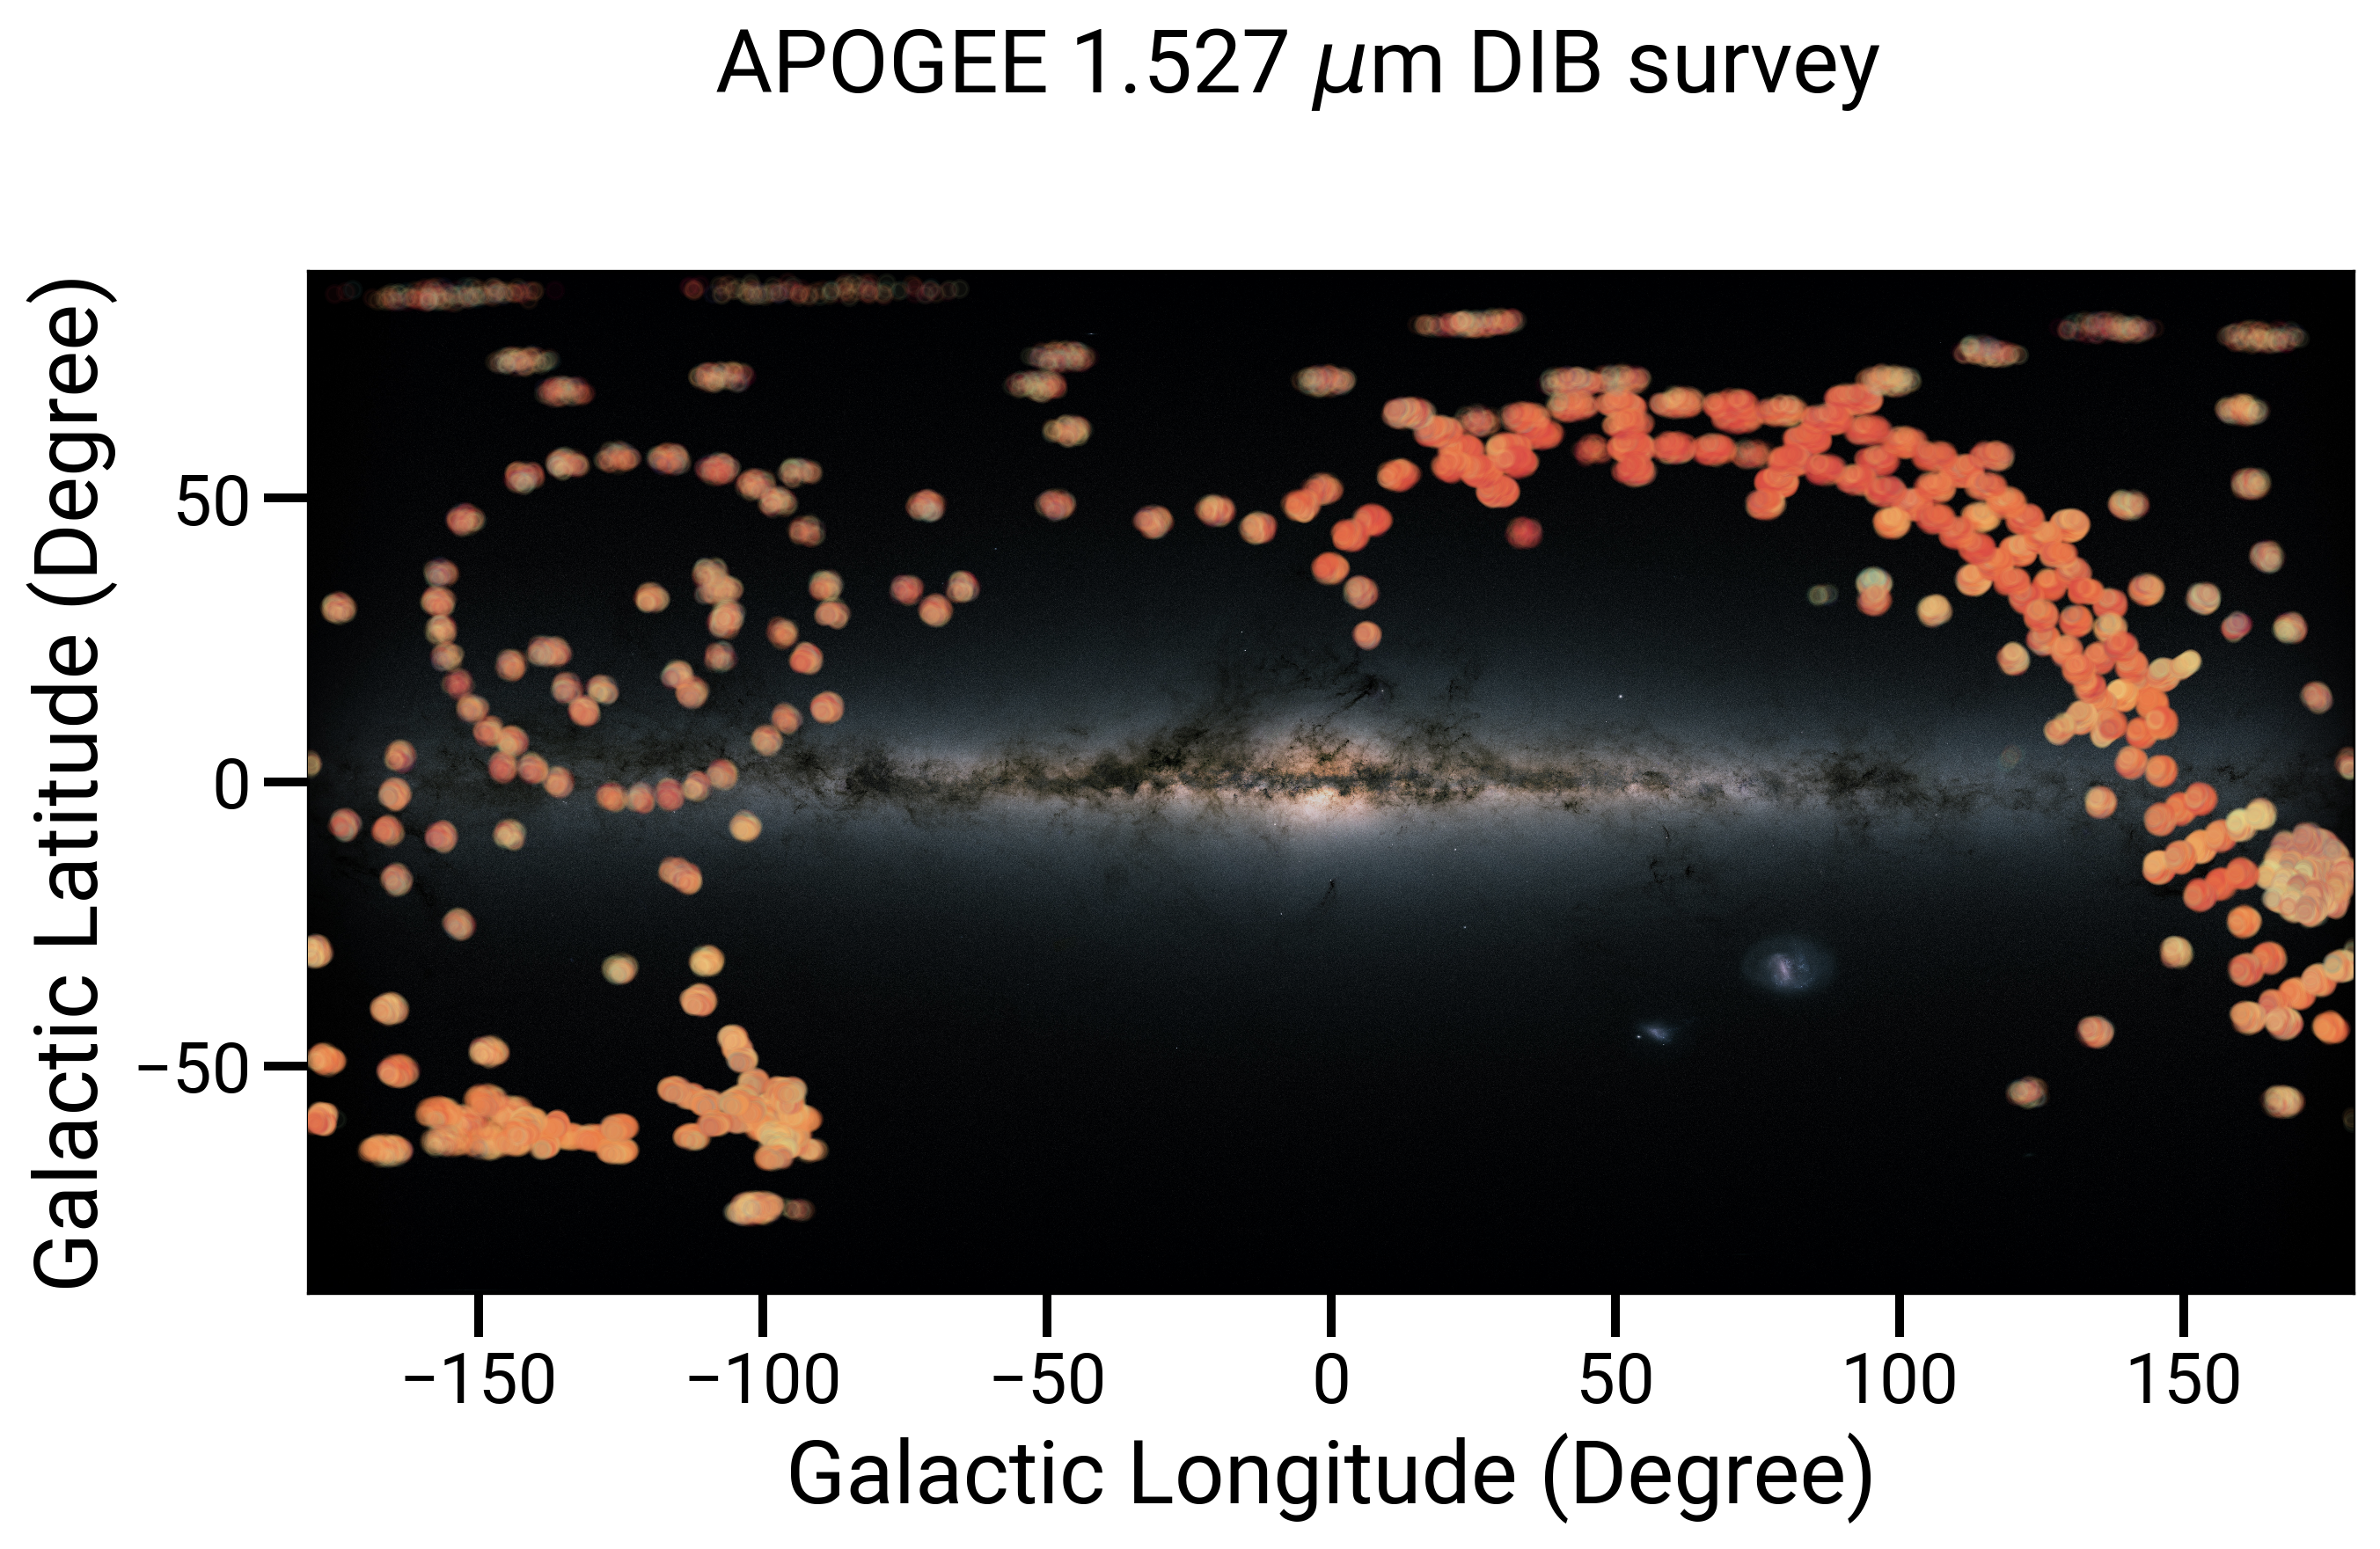

In [6]:
plot_instance = MWSkyMap(projection='equirectangular')

# Here are some setting you can set after setting up a MWPlot instance
plot_instance.title = "APOGEE 1.527 $\mu$m DIB survey"  # plot title, or it can be None to show no title
plot_instance.fontsize = 24  # fontsize for matplotlib plotting
plot_instance.figsize = (10, 6)  # figsize for matplotlib plotting
plot_instance.dpi = 300  # dpi for matplotlib plotting
plot_instance.cmap = 'Spectral'  # matplotlib cmap: https://matplotlib.org/examples/color/colormaps_reference.html
# plot_instance.clim = (vmin, vmax) # colorbar range
plot_instance.imalpha = 0.85  # alpha value for the milkyway image
plot_instance.s = 20.0  # make the scatter points bigger
# plot_instance.tight_layout = True # whether plt.tight_layout() will be run

# Here is the mw_scatter if you have an array to color the point
# x and y must both carry astropy unit

plot_instance.mw_scatter(df["GLON"].to_numpy() * u.degree, 
                         df["GLAT"].to_numpy() * u.degree, 
                         c=df["FWHM_DIB"] / df["FWHM_DIB"].max(), 
                         alpha=0.05)


In [7]:
plot_instance.savefig("dibs_apogee_survey.png")

Data obtained from http://dibdata.org/HD183143/ and from APOGEE survey http://www.physics.utah.edu/~zasowski/APOGEE_DIB_Catalog.html

In [12]:
df = pd.read_excel("dibdata_table.xls", skiprows=2)

In [13]:
df = df[[f"Unnamed: {index}" for index in[4, 5, ]]]

Unnamed: 0  Unnamed: 1 Unnamed: 2 Unnamed: 3  Unnamed: 4 Unnamed: 5  \
0          NaN         NaN        NaN        NaN     4371.73       1.03   
1        28.88         NaN      27.96        NaN     4428.83      22.56   
2          NaN         NaN        NaN        NaN     4494.55       2.09   
3          1.8        1.80       1.65        NaN     4501.66       3.01   
4          NaN         NaN        NaN        NaN     4650.77       1.61   
..         ...         ...        ...        ...         ...        ...   
413        NaN         NaN        NaN        NaN     8085.94       2.36   
414        NaN         NaN        NaN        NaN     8154.23        3.3   
415      blend       20.79        NaN        NaN     8620.99       3.57   
416        NaN         NaN        NaN        NaN     8763.83       0.99   
417        NaN         NaN        NaN        NaN     8772.77       2.36   

    Unnamed: 6 Unnamed: 7 Unnamed: 8  Unnamed: 9 Unnamed: 10 (mÅ)  Unnamed: 12  
0         10.8        2.1          s       71.43       71.26  6.3            1  
1         5700       43.3          s       28.52         > 1   --            2  
2         20.1        3.8          s       94.24       93.28  2.3            3  
3        211.2        5.4          s        1.35         1.4  7.1            4  
4         17.3        2.6          s       50.45       50.79  5.1            5  
..         ...        ...        ...         ...         ...  ...          ...  
413       33.4        2.7        NaN       85.39         NaN  NaN          414  
414       92.1        3.8        NaN       53.68         NaN  NaN          415  
415      355.8        4.2        NaN       20.40         NaN  NaN          416  
416       21.2          1          s       63.23       63.77  5.9          417  
417       24.4        2.8        NaN       72.17         NaN  NaN          418  

[418 rows x 13 columns]